# Exploring data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.impute import SimpleImputer

## Loading CSV

In [2]:
df = pd.read_csv('train.csv')

## Looking for data format

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [4]:
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
df['Genre'].value_counts()

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64

In [7]:
df['Podcast_Name'].value_counts()

Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
M

## Processing the data

In [8]:
df['Episode_Number'] = df['Episode_Title'].str.extract(r'(\d+)').astype(int)
df = df.drop('Episode_Title', axis=1)

In [9]:
df.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Number
0,0,Mystery Matters,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,98
1,1,Joke Junction,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,26
2,2,Study Sessions,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,16
3,3,Digital Digest,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,45
4,4,Mind & Body,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,86


### Applying One Hot Encodding at some columns

In [10]:
columns_to_one_hot = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
df = pd.get_dummies(df, columns=columns_to_one_hot)

In [11]:
df.head()

,id,Podcast_Name,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Genre_Business,Genre_Comedy,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0,Mystery Matters,NaN,74.81,NaN,0.0,31.41998,98,False,False,...,True,False,False,False,False,False,True,False,False,True
1,1,Joke Junction,119.80,66.95,75.95,2.0,88.01241,26,False,True,...,False,False,False,True,False,False,False,True,False,False
2,2,Study Sessions,73.90,69.97,8.97,0.0,44.92531,16,False,False,...,False,True,False,False,True,False,False,True,False,False
3,3,Digital Digest,67.17,57.22,78.70,2.0,46.27824,45,False,False,...,False,False,False,False,False,True,False,False,False,True
4,4,Mind & Body,110.51,80.07,58.68,3.0,75.61031,86,False,False,...,False,False,False,True,False,False,False,False,True,False


### Embedding the Podcast Name

In [12]:
import numpy as np

# Caminho do arquivo GloVe
GLOVE_PATH = "glove.6B/glove.6B.100d.txt"  # por exemplo

# Carregar GloVe em memória
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Função para vetorizar um título
def embed_title(title, embeddings, dim=100):
    words = title.lower().split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

# Exemplo de uso
glove = load_glove_embeddings(GLOVE_PATH)
# vetor = embed_title("Smartphone com câmera ultrawide", glove)
# print(vetor.shape)  # (100,)


In [13]:
df['Podcast_Embedding'] = df['Podcast_Name'].apply(lambda x: embed_title(x, glove, dim=100))

In [14]:
df.head()

,id,Podcast_Name,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Genre_Business,Genre_Comedy,...,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive,Podcast_Embedding
0,0,Mystery Matters,NaN,74.81,NaN,0.0,31.41998,98,False,False,...,False,False,False,False,False,True,False,False,True,"[-0.061355002, -0.052438498, 0.841655, 0.23137..."
1,1,Joke Junction,119.80,66.95,75.95,2.0,88.01241,26,False,True,...,False,False,True,False,False,False,True,False,False,"[-0.142665, -0.23665701, 0.3445005, -0.3208649..."
2,2,Study Sessions,73.90,69.97,8.97,0.0,44.92531,16,False,False,...,True,False,False,True,False,False,True,False,False,"[0.072463, 0.395992, -0.396025, 0.2693015, 0.0..."
3,3,Digital Digest,67.17,57.22,78.70,2.0,46.27824,45,False,False,...,False,False,False,False,True,False,False,False,True,"[-0.417915, -0.168632, 0.23964, -0.13462, 0.11..."
4,4,Mind & Body,110.51,80.07,58.68,3.0,75.61031,86,False,False,...,False,False,True,False,False,False,False,True,False,"[-0.06228867, -0.056680005, 0.062063333, -0.36..."


#### Expanding the embedding at columns

In [15]:
# Transforma coluna com vetores em múltiplas colunas numéricas
embedding_cols = pd.DataFrame(df['Podcast_Embedding'].tolist(),
                               columns=[f'Podcast_Embed_{i}' for i in range(100)])

# Junta com o DataFrame original
df = pd.concat([df, embedding_cols], axis=1)

# Opcional: remover a coluna com o vetor bruto
df.drop(columns=['Podcast_Embedding'], inplace=True)


In [16]:
df.head()

,id,Podcast_Name,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Genre_Business,Genre_Comedy,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,0,Mystery Matters,NaN,74.81,NaN,0.0,31.41998,98,False,False,...,-0.191959,0.259265,-0.212915,-0.082970,-0.056235,0.480065,0.124270,-0.421410,0.28618,0.225935
1,1,Joke Junction,119.80,66.95,75.95,2.0,88.01241,26,False,True,...,-0.351210,0.363415,-0.271596,0.415645,-0.201900,-0.193430,0.506583,-0.123942,0.56817,0.747140
2,2,Study Sessions,73.90,69.97,8.97,0.0,44.92531,16,False,False,...,-0.116570,-0.232258,-0.052785,0.449284,0.106903,0.496355,-0.259750,-0.293270,0.43791,-0.020877
3,3,Digital Digest,67.17,57.22,78.70,2.0,46.27824,45,False,False,...,0.649245,0.759525,0.154494,-0.603610,-0.345495,-0.295645,0.586545,-0.910115,1.01095,0.730029
4,4,Mind & Body,110.51,80.07,58.68,3.0,75.61031,86,False,False,...,0.046611,-0.249599,0.221633,0.575140,0.040458,0.288050,-0.376367,-0.713273,0.73138,0.116122


In [17]:
df.drop(columns=['Podcast_Name'], inplace=True)

In [18]:
df.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,0,NaN,74.81,NaN,0.0,31.41998,98,False,False,False,...,-0.191959,0.259265,-0.212915,-0.082970,-0.056235,0.480065,0.124270,-0.421410,0.28618,0.225935
1,1,119.80,66.95,75.95,2.0,88.01241,26,False,True,False,...,-0.351210,0.363415,-0.271596,0.415645,-0.201900,-0.193430,0.506583,-0.123942,0.56817,0.747140
2,2,73.90,69.97,8.97,0.0,44.92531,16,False,False,True,...,-0.116570,-0.232258,-0.052785,0.449284,0.106903,0.496355,-0.259750,-0.293270,0.43791,-0.020877
3,3,67.17,57.22,78.70,2.0,46.27824,45,False,False,False,...,0.649245,0.759525,0.154494,-0.603610,-0.345495,-0.295645,0.586545,-0.910115,1.01095,0.730029
4,4,110.51,80.07,58.68,3.0,75.61031,86,False,False,False,...,0.046611,-0.249599,0.221633,0.575140,0.040458,0.288050,-0.376367,-0.713273,0.73138,0.116122


### Filling the NaN values

#### Removing IDs column

In [19]:
ids_col = df.pop('id')

In [20]:
ids_col.head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [21]:
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,NaN,74.81,NaN,0.0,31.41998,98,False,False,False,False,...,-0.191959,0.259265,-0.212915,-0.082970,-0.056235,0.480065,0.124270,-0.421410,0.28618,0.225935
1,119.80,66.95,75.95,2.0,88.01241,26,False,True,False,False,...,-0.351210,0.363415,-0.271596,0.415645,-0.201900,-0.193430,0.506583,-0.123942,0.56817,0.747140
2,73.90,69.97,8.97,0.0,44.92531,16,False,False,True,False,...,-0.116570,-0.232258,-0.052785,0.449284,0.106903,0.496355,-0.259750,-0.293270,0.43791,-0.020877
3,67.17,57.22,78.70,2.0,46.27824,45,False,False,False,False,...,0.649245,0.759525,0.154494,-0.603610,-0.345495,-0.295645,0.586545,-0.910115,1.01095,0.730029
4,110.51,80.07,58.68,3.0,75.61031,86,False,False,False,True,...,0.046611,-0.249599,0.221633,0.575140,0.040458,0.288050,-0.376367,-0.713273,0.73138,0.116122


#### Removing the target column

In [22]:
y_col = df.pop('Listening_Time_minutes')

In [23]:
y_col.head()

0    31.41998
1    88.01241
2    44.92531
3    46.27824
4    75.61031
Name: Listening_Time_minutes, dtype: float64

In [24]:
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,NaN,74.81,NaN,0.0,98,False,False,False,False,False,...,-0.191959,0.259265,-0.212915,-0.082970,-0.056235,0.480065,0.124270,-0.421410,0.28618,0.225935
1,119.80,66.95,75.95,2.0,26,False,True,False,False,False,...,-0.351210,0.363415,-0.271596,0.415645,-0.201900,-0.193430,0.506583,-0.123942,0.56817,0.747140
2,73.90,69.97,8.97,0.0,16,False,False,True,False,False,...,-0.116570,-0.232258,-0.052785,0.449284,0.106903,0.496355,-0.259750,-0.293270,0.43791,-0.020877
3,67.17,57.22,78.70,2.0,45,False,False,False,False,False,...,0.649245,0.759525,0.154494,-0.603610,-0.345495,-0.295645,0.586545,-0.910115,1.01095,0.730029
4,110.51,80.07,58.68,3.0,86,False,False,False,True,False,...,0.046611,-0.249599,0.221633,0.575140,0.040458,0.288050,-0.376367,-0.713273,0.73138,0.116122


#### Normalizing data

In [25]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [26]:
# dump(scaler, 'scaler.joblib')

In [27]:
df.columns[1:]

Index(['Host_Popularity_percentage', 'Guest_Popularity_percentage',
       'Number_of_Ads', 'Episode_Number', 'Genre_Business', 'Genre_Comedy',
       'Genre_Education', 'Genre_Health', 'Genre_Lifestyle', 'Genre_Music',
       ...
       'Podcast_Embed_90', 'Podcast_Embed_91', 'Podcast_Embed_92',
       'Podcast_Embed_93', 'Podcast_Embed_94', 'Podcast_Embed_95',
       'Podcast_Embed_96', 'Podcast_Embed_97', 'Podcast_Embed_98',
       'Podcast_Embed_99'],
      dtype='object', length=128)

In [28]:
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [29]:
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,NaN,0.653611,NaN,-1.171766,1.657582,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,-1.023713,0.418261,-0.776574,-0.088732,0.567832,1.608396,0.484065,-0.149683,-0.924076,-0.285117
1,1.677160,0.309976,0.833481,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-1.514966,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425
2,0.284968,0.442009,-1.520724,-1.171766,-1.262063,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-0.791153,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021
3,0.080840,-0.115415,0.930138,0.565657,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,1.571219,2.008528,0.215965,-1.791090,-0.224865,-1.339929,1.635518,-1.438292,0.806239,1.025922
4,1.395385,0.883576,0.226477,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-0.287775,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716


#### Normalizing target column

In [30]:
scaler_y = StandardScaler()
scaler_y.fit(y_col.values.reshape(-1, 1))

StandardScaler()

In [31]:
# dump(scaler_y, 'scaler_y.joblib')

In [32]:
df_y = pd.DataFrame(scaler_y.transform(y_col.values.reshape(-1, 1)), columns=['Listening_Time_minutes'])

In [33]:
df_y.head()

,Listening_Time_minutes
0,-0.516518
1,1.568817
2,-0.018870
3,0.030983
4,1.111820


#### Merging again with target column

In [34]:
df = pd.concat([df, df_y], axis=1)
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99,Listening_Time_minutes
0,NaN,0.653611,NaN,-1.171766,1.657582,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.418261,-0.776574,-0.088732,0.567832,1.608396,0.484065,-0.149683,-0.924076,-0.285117,-0.516518
1,1.677160,0.309976,0.833481,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425,1.568817
2,0.284968,0.442009,-1.520724,-1.171766,-1.262063,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021,-0.018870
3,0.080840,-0.115415,0.930138,0.565657,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,2.008528,0.215965,-1.791090,-0.224865,-1.339929,1.635518,-1.438292,0.806239,1.025922,0.030983
4,1.395385,0.883576,0.226477,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716,1.111820


#### Using the KNNImputer to fill NaN values

In [35]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)

SimpleImputer()

In [36]:
# dump(imputer, 'imputer.joblib')

In [37]:
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [38]:
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99,Listening_Time_minutes
0,-3.477432e-16,0.653611,-3.004898e-16,-1.171766,1.657582,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.418261,-0.776574,-0.088732,0.567832,1.608396,0.484065,-0.149683,-0.924076,-0.285117,-0.516518
1,1.677160e+00,0.309976,8.334811e-01,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425,1.568817
2,2.849676e-01,0.442009,-1.520724e+00,-1.171766,-1.262063,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021,-0.018870
3,8.084003e-02,-0.115415,9.301377e-01,0.565657,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,2.008528,0.215965,-1.791090,-0.224865,-1.339929,1.635518,-1.438292,0.806239,1.025922,0.030983
4,1.395385e+00,0.883576,2.264772e-01,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716,1.111820


#### Merging again with IDs column

In [39]:
# df['id'] = ids_col
# df.head()

In [40]:
# df.info()

### Gravando o dataframe processado num novo arquivo CSV

In [41]:
# df.to_csv('train_processed.csv', index=False)

# Making the AI model

In [42]:
import pandas as pd
import numpy as np

from joblib import dump, load

## Loading dataset

In [43]:
# df = pd.read_csv('train_processed.csv', header=0)

In [44]:
# ids = df.pop('id')

In [45]:
# df.head()

# Separando as bases de treino e teste

In [46]:
train = df.sample(frac=0.75, random_state=0)
test = df.drop(train.index)

In [47]:
x_train = train
y_train = train.pop('Listening_Time_minutes')

In [48]:
print(x_train.shape)
x_train.head(5)

(562500, 129)


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
629436,-1.027454e+00,-1.134517,-2.223613e-01,-0.303054,-1.724934,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.626289,-0.286291,0.091187,-0.343969,0.366109,0.887332,0.406226,0.089579,0.627817,-0.008211
525015,-3.477432e-16,0.461682,-7.098624e-01,1.434369,-1.724934,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.791957,0.280409,-0.677255,-1.675407,-0.554471,-1.180162,-0.268244,-0.386334,-0.121098,0.052192
114041,1.007149e+00,-1.626362,-1.704547e+00,1.434369,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,1.705731,0.904423,1.236548,-1.009606,-1.494288,0.594588,1.743633,-1.714020,0.935636,2.061493
523286,-2.543174e-01,-1.475092,-1.350257e+00,-1.171766,1.443949,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.072314,1.057136,0.260459,-2.003673,0.691439,1.927132,0.400299,0.576367,1.485932,0.562999
613265,3.477528e-01,1.243824,-3.004898e-16,-1.171766,-1.546907,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,0.776517,-2.032318,2.230480,-1.063394,-2.134288,-0.927237,-0.526594,-0.770026,-0.076131,-1.791080


In [49]:
print(y_train.shape)
y_train.head(5)

(562500,)


629436   -1.121337
525015   -0.099715
114041    0.335445
523286   -0.522858
613265    0.858139
Name: Listening_Time_minutes, dtype: float64

# Building the model

## Imports and GPU config

In [50]:
from tensorflow.keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

2025-04-22 14:57:37.748362: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 14:57:38.134438: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-22 14:57:38.134468: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 14:57:38.136198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 14:57:38.309527: I tensorflow/core/platform/cpu_feature_g

Num GPUs Available:  1


2025-04-22 14:57:40.024782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 14:57:40.440540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 14:57:40.440744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Definição do modelo

2025-04-22 14:57:40.469934: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 14:57:40.470176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 14:57:40.470265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

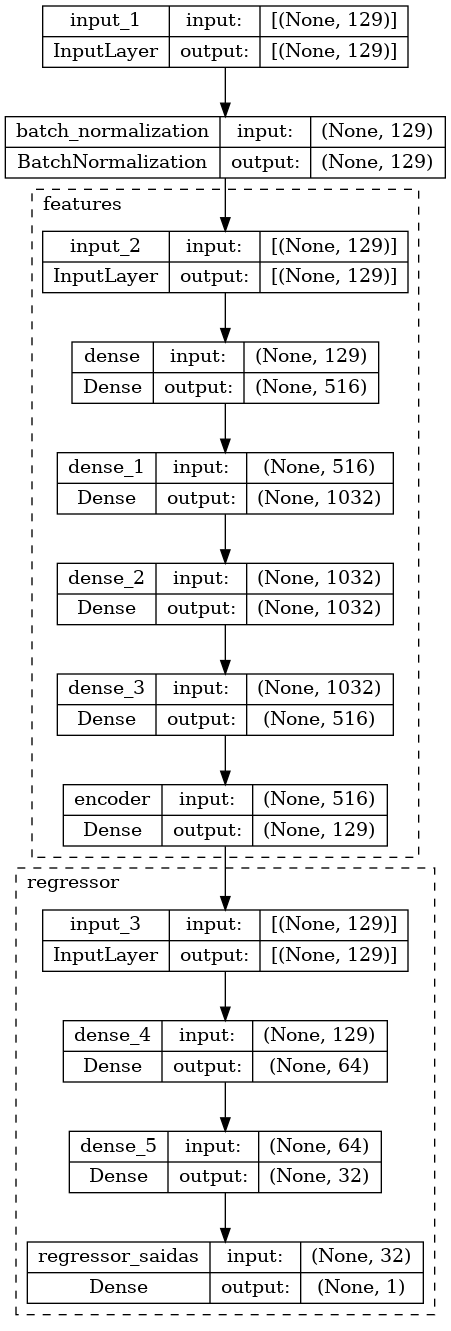

In [51]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims*4), activation=activation, use_bias=bias, kernel_regularizer=None)(input_layer)
  # x_1 = tf.keras.layers.Dropout(0.2)(x_0)
  x_2 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_2)
  x_4 = Dense(int(input_dims*4), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims), activation=activation, name='encoder', use_bias=bias, kernel_regularizer="l1")(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(input_layer)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_2)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  x_n = BatchNormalization()(input_layer)

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'relu', True)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
plot_model(model, show_shapes=True, expand_nested=True)

## Treinando o modelo

In [52]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2, callbacks=[callback])

Epoch 1/20


2025-04-22 14:57:42.833428: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f780a779140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-22 14:57:42.833454: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-22 14:57:42.842214: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-22 14:57:42.899597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-04-22 14:57:42.969168: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14063/14063 [==============================] - 43s 3ms/step - loss: 0.4513 - mae: 0.4008 - mse: 0.2835 - val_loss: 0.3202 - val_mae: 0.3629 - val_mse: 0.2431
Epoch 2/20
14063/14063 [==============================] - 40s 3ms/step - loss: 0.3487 - mae: 0.3903 - mse: 0.2713 - val_loss: 0.3207 - val_mae: 0.3638 - val_mse: 0.2438
Epoch 3/20
14063/14063 [==============================] - 41s 3ms/step - loss: 0.3467 - mae: 0.3886 - mse: 0.2696 - val_loss: 0.3278 - val_mae: 0.3725 - val_mse: 0.2507
Epoch 4/20
14063/14063 [==============================] - 43s 3ms/step - loss: 0.3457 - mae: 0.3881 - mse: 0.2686 - val_loss: 0.3197 - val_mae: 0.3600 - val_mse: 0.2427
Epoch 5/20
14063/14063 [==============================] - 45s 3ms/step - loss: 0.3454 - mae: 0.3878 - mse: 0.2683 - val_loss: 0.3169 - val_mae: 0.3593 - val_mse: 0.2400
Epoch 6/20
14063/14063 [==============================] - 48s 3ms/step - loss: 0.3452 - mae: 0.3879 - mse: 0.2682 - val_loss: 0.3182 - val_mae: 0.3594 - val_mse: 0.24

## Analysing error metrics

In [53]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch,rmse,val_rmse
5,0.345204,0.387884,0.268215,0.318248,0.359433,0.240970,5,0.517894,0.490887
6,0.343494,0.386170,0.266548,0.319277,0.358725,0.241157,6,0.516283,0.491077
7,0.343972,0.386770,0.267008,0.317969,0.360726,0.240508,7,0.516728,0.490416
8,0.343910,0.386640,0.267007,0.318963,0.361564,0.242334,8,0.516728,0.492275
9,0.343138,0.386105,0.266228,0.319427,0.360322,0.242840,9,0.515973,0.492788


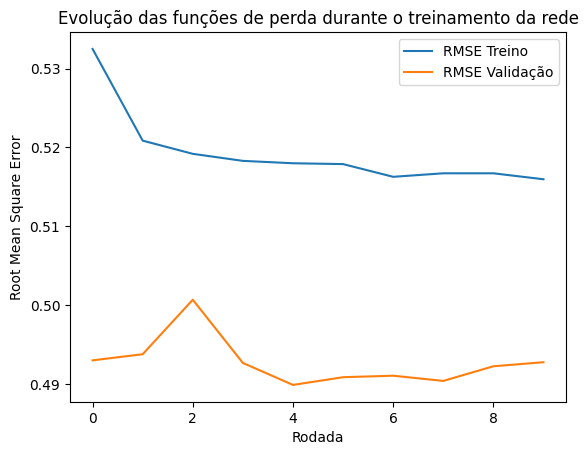

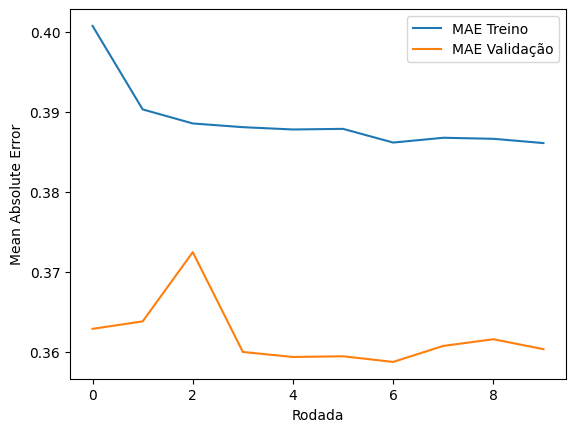

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Evaluating the model

### Preparing test dataframe

In [55]:
x_test = test
y_test = test.pop('Listening_Time_minutes')
print(x_test.shape)
x_test.head(5)

(187500, 129)


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
1,1.677160,0.309976,8.334811e-01,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-1.514966,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425
4,1.395385,0.883576,2.264772e-01,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-0.287775,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716
15,0.116024,0.676345,1.429238e+00,-1.171766,-0.158295,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.169648,0.433356,-1.973291,0.919960,-1.271505,0.986772,0.346645,0.958411,0.850991,-0.181684
16,0.423580,-0.481785,-3.004898e-16,0.565657,1.087895,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-0.791153,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021
22,0.052026,0.128977,1.287240e+00,-1.171766,0.090943,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.072314,1.057136,0.260459,-2.003673,0.691439,1.927132,0.400299,0.576367,1.485932,0.562999


In [56]:
# scaler_y = load('scaler_y.joblib')
y_test = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

In [57]:
print(y_test)

[[88.01241]
 [75.61031]
 [63.97718]
 ...
 [61.16847]
 [56.87058]
 [15.26   ]]


### Running prediction

In [58]:
y_pred = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
print(y_pred)

5860/5860 [==============================] - 7s 1ms/step
[[84.11739 ]
 [73.71086 ]
 [48.477707]
 ...
 [85.75217 ]
 [52.386963]
 [20.12874 ]]


### Calculating error metrics

In [59]:
mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
rmse = np.sqrt(mse)

In [60]:
print(f"RMSE Test: {rmse}")
print(f"MSE Test: {mse}")
print(f"MAE Test: {mae}")

RMSE Test: 13.336048126220703
MSE Test: 177.85018920898438
MAE Test: 9.774401664733887


## Saving the model

In [61]:
# model.save('model.keras')
# features.save('features.keras')
# dump(model, 'model.joblib')
# dump(features, 'features.joblib')

# Making the submission file

## Loading the test dataset

In [76]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [77]:
# Separar o ID
test_ids_col = test_df.pop('id')

# Extrair o número do episódio e remover a coluna 'Episode_Title'
test_df['Episode_Number'] = test_df['Episode_Title'].str.extract(r'(\d+)').astype(int)
test_df = test_df.drop('Episode_Title', axis=1)

# Aplicar One Hot Encoding nas mesmas colunas
columns_to_one_hot = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
test_df = pd.get_dummies(test_df, columns=columns_to_one_hot)

# Aplicar o embedding via GloVe na coluna 'Podcast_Name'
test_df['Podcast_Embedding'] = test_df['Podcast_Name'].apply(lambda x: embed_title(x, glove, dim=100))

# Expandir o embedding em múltiplas colunas
embedding_cols_test = pd.DataFrame(test_df['Podcast_Embedding'].tolist(),
                                   columns=[f'Podcast_Embed_{i}' for i in range(100)])
test_df = pd.concat([test_df, embedding_cols_test], axis=1)
test_df.drop(columns=['Podcast_Embedding'], inplace=True)

# Remover a coluna 'Podcast_Name'
test_df.drop(columns=['Podcast_Name'], inplace=True)

# Normalizar os dados
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

# Adicionar uma coluna "Listening_Time_minutes" com valores fake 0
test_df['Listening_Time_minutes'] = 0

# Preencher valores NaN com o imputador
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

# Remover a coluna fake "Listening_Time_minutes"
test_df.drop(columns=['Listening_Time_minutes'], inplace=True)

test_df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,0.438442,-0.950895,3.843600e-02,-0.303054,0.767446,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-1.136294,0.238342,-0.334171,-0.513947,-1.214106,-1.687950,0.081732,-0.306730,-0.585775,0.790164
1,-1.111168,0.499718,-3.004898e-16,-1.171766,-1.012825,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,-0.350458,0.077183,-1.679629,-0.241348,1.036780,0.857015,-2.739905,-0.192109,-0.408195,-1.792622
2,0.139379,0.351072,1.591269e+00,-1.171766,-1.440090,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-1.514966,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425
3,1.543400,-1.594009,-1.709765e-02,0.565657,0.767446,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-0.505848,-0.466422,-0.781869,1.626556,-0.931723,0.241000,1.144218,0.894100,-0.811689,-0.252507
4,0.237045,-0.076942,-1.438829e+00,0.565657,-0.051479,-0.346806,-0.34905,-0.264675,-0.324411,2.845208,...,-0.605542,-0.309433,1.237021,0.878194,0.131925,-0.818589,-0.600924,-1.066097,-1.339897,0.428681


In [78]:
# Fazer a previsão
submission_pred = model.predict(test_df)

# Desnormalizar o resultado
submission_pred = scaler_y.inverse_transform(submission_pred.reshape(-1, 1))

# Criar o DataFrame de submissão
submission_df = pd.DataFrame({'id': test_ids_col, 'Listening_Time_minutes': submission_pred.flatten()})

submission_df.head()

7813/7813 [==============================] - 6s 788us/step


,id,Listening_Time_minutes
0,750000,53.975353
1,750001,18.639978
2,750002,47.867538
3,750003,81.153641
4,750004,46.067749


In [79]:
# Salvar o DataFrame de submissão em um arquivo CSV
submission_df.to_csv('submission.csv', index=False)